In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

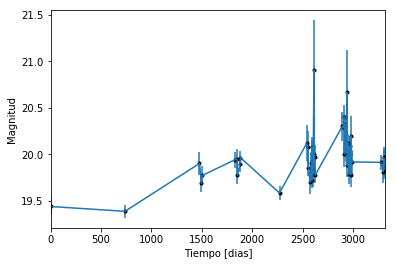

In [2]:
data = np.genfromtxt('LC_22611_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

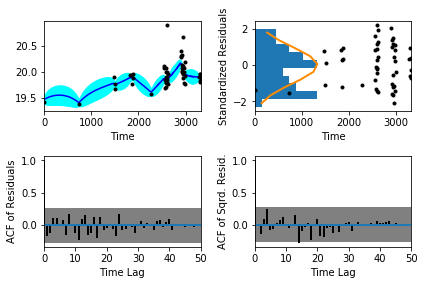

In [5]:
sample.assess_fit()

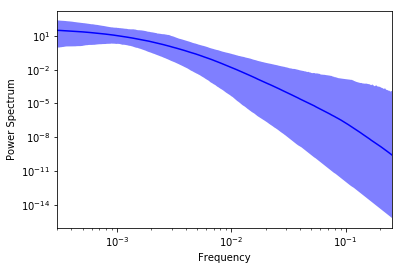

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,1.97162,'Medida del nivel de ruido')

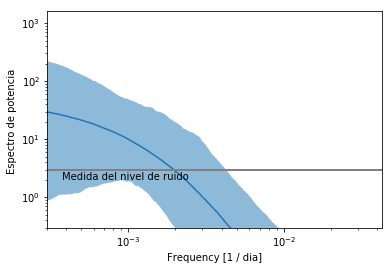

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

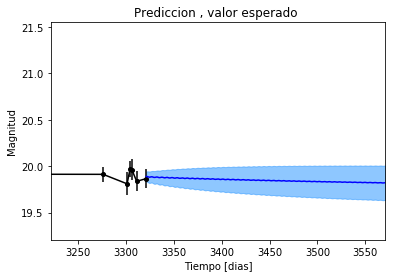

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

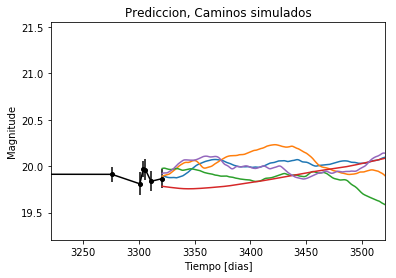

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


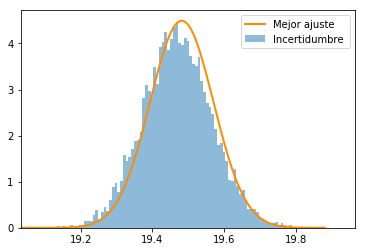

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

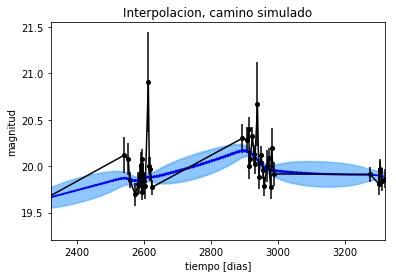

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

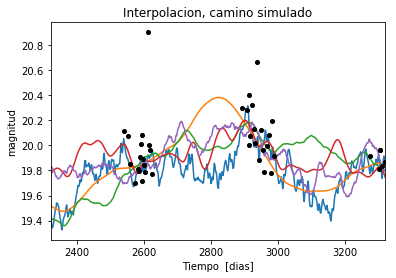

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 644.24320451
Median: 0.00733966975318
Standard deviation: 0.0977147665401
68% credibility interval: [ 0.00088029  0.09693663]
95% credibility interval: [  3.52471685e-04   3.88630763e-01]
99% credibility interval: [  3.15012270e-04   4.79417098e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1553.53536284
Median: 0.00175975479266
Standard deviation: 0.0334453014152
68% credibility interval: [ 0.00047217  0.01286861]
95% credibility interval: [ 0.00032423  0.10261259]
99% credibility interval: [ 0.0003067   0.23194072]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 358.758569463
Median: 0.0152920894234
Standard deviation

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1641.16636783
Median: 38.3850236636
Standard deviation: 1.62093813411
68% credibility interval: [ 36.58561929  39.6031309 ]
95% credibility interval: [ 34.16782676  40.20193445]
99% credibility interval: [ 32.09545551  40.49792812]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 455.479619092
Median: 0.388000199118
Standard deviation: 1.05756111278
68% credibility interval: [ 0.04929264  2.05789941]
95% credibility interval: [ 0.01502681  3.5020846 ]
99% credibility interval: [ 0.01003893  4.78054033]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 750.032484441
Median: 0.13956735988
Standard deviation: 1.87797389457
68% credibility interval: [ 0.00642778  1.96422113]
95% credibility interval: [  6.70624584e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3949.31722579
Median: 3.29083998863e-27
Standard deviation: 2.41238230498e+85
68% credibility interval: [  1.22417844e-59   5.70016638e-04]
95% credibility interval: [  1.29464902e-83   5.69800513e+64]
99% credibility interval: [  8.48054486e-100   3.24273535e+079]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1490.67994262
Median: 19.7494886915
Standard deviation: 0.143930685421
68% credibility interval: [ 19.61415738  19.86459593]
95% credibility interval: [ 19.42863205  19.99436595]
99% credibility interval: [ 19.27258325  20.14498737]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 376.470926608
Median: 0.00301104717108
Standard deviation: 0.113984695974
68% credibility interval: [ 0.          0.16997875]
95% credibility interval: [ 0.          0.41582984]
99% credibility interval: [ 0.          0.48710898]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 376.470926608
Median: 0.00301104717108
Standard deviation: 0.113984695974
68% credibility interval: [ 0.          0.16997875]
95% credibility interval: [ 0.          0.41582984]
99% credibility interval: [ 0.          0.48710898]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1111.53252339
Median: 0.0
Standard deviation: 0.000704325617709
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1641.16636783
Median: 38.3850236636
Standard deviation: 1.62093813411
68% credibility interval: [ 36.58561929  39.6031309 ]
95% credibility interval: [ 34.16782676  40.20193445]
99% credibility interval: [ 32.09545551  40.49792812]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1190.99429535
Median: 0.072999181936
Standard deviation: 0.107640328589
68% credibility interval: [ 0.039996    0.14307475]
95% credibility interval: [ 0.02504098  0.3584226 ]
99% credibility interval: [ 0.01840163  0.62733024]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1833.27793631
Median: 1.16198927417
Standard deviation: 0.1835736867
68% credibility interval: [ 1.00183158  1.35338142]
95% credibility interval: [ 0.86407182  1.5940967 ]
99% credibility interval: [ 0.78746052  1.76535849]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1652.13384659
Median: 5.89334190428e-05
Standard deviation: 0.0193643997704
68% credibility interval: [  7.27587966e-07   1.72005676e-03]
95% credibility interval: [  6.64088716e-69   2.52352231e-02]
99% credibility interval: [  1.36626232e-83   1.25704781e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 644.24320451
Median: (-0.0461165051527+0j)
Standard deviation: 0.943329547601
68% credibility interval: [-0.60907081-0.50312304j -0.00553100-2.16137606j]
95% credibility interval: [ -2.44183910e+00+0.j          -2.21464491e-03-0.05951229j]
99% credibility interval: [ -3.01226647e+00+0.j          -1.97928047e-03-2.48506956j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1553.53536284
Median: (-0.0110568654575+0j)
Standard deviation: 0.746380508351
68% credibility interval: [-0.08085584+0.j         -0.00296676+0.41409953j]
95% credibility interval: [-0.64473391+0.j         -0.00203717+0.00899948j]
99% credibility interval: [-1.45732654+0.17580222j -0.00192703+0.j        ]
Posterior summary for parameter ar_roots  eleme